## Imports

In [58]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocess Data

In [38]:
coinbase_data = "./data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv"

coinbase_df = pd.read_csv(bitcoin_data)

coinbase_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083168,4006.017232
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


<Axes: xlabel='Timestamp'>

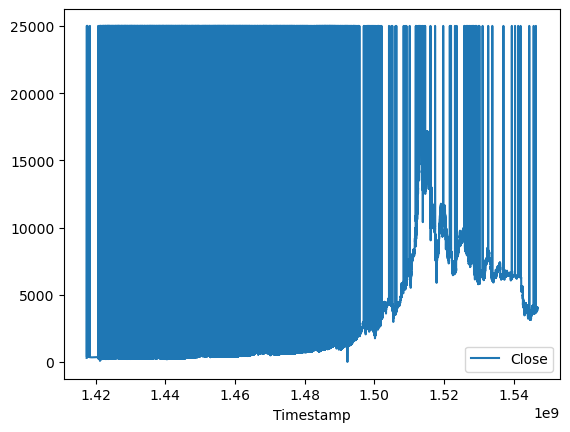

In [39]:
coinbase_df.fillna(25000).plot(x="Timestamp", y="Close", kind='line')

It seems like there is a good amount of NaN in this data set, let's see about the binance data

In [40]:
binance_data = "./data/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv"

binance_df = pd.read_csv(binance_data)
binance_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4363452,1587513360,6847.97,6856.35,6847.97,6856.35,0.125174,858.128697,6855.498790
4363453,1587513420,6850.23,6856.13,6850.23,6850.89,1.224777,8396.781459,6855.763449
4363454,1587513480,6846.50,6857.45,6846.02,6857.45,7.089168,48533.089069,6846.090966
4363455,1587513540,6854.18,6854.98,6854.18,6854.98,0.012231,83.831604,6854.195090


<Axes: xlabel='Timestamp'>

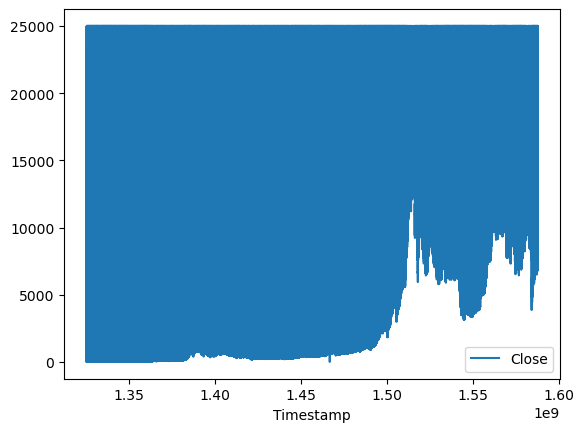

In [41]:
binance_df.fillna(25000).plot(x="Timestamp", y="Close", kind='line')

This looks like an equal amount of NaN, if not even more. I think I will go with the coinbase DF.

Now, I am going to get rid of the first portion of the coinbase data, as it seems to have significantly more NaN

<Axes: xlabel='Timestamp'>

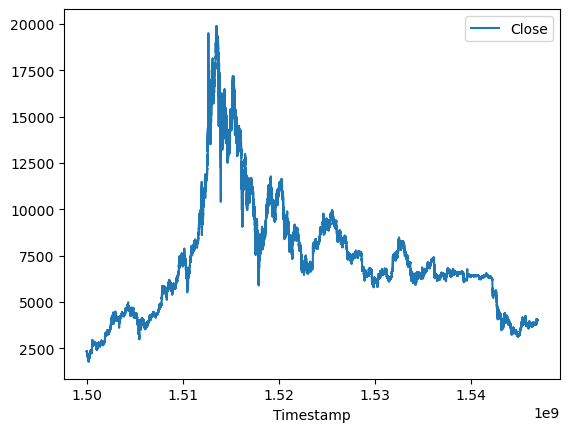

In [43]:
coinbase_df = coinbase_df[coinbase_df['Timestamp'] >= 1500000000]

# Linear interpolation to fill fill in values for NaN's
coinbase_df = coinbase_df.interpolate()

# Plot again to see
coinbase_df.plot(x='Timestamp', y=['Close'], kind='line')

## Start building model

In [44]:
# Hour intervals of dataset
df = coinbase_df[::60]

# Split the data
indices_columns = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_data = df[0:int(n*.7)]
valid_data = df[int(n*.7):int(n*.9)]
test_data = df[int(n*.9):]

In [45]:
# Normalize the data

train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
valid_data = (valid_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

train_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1318113,-1.731766,-1.577297,-1.576358,-1.577779,-1.576686,-0.409994,-0.414377,-1.577205
1318173,-1.731386,-1.574892,-1.574391,-1.575256,-1.574717,-0.474717,-0.428615,-1.574834
1318233,-1.731006,-1.574317,-1.572755,-1.574678,-1.573079,0.831189,-0.139214,-1.574235
1318293,-1.730626,-1.572937,-1.572438,-1.573299,-1.572762,-0.452621,-0.423676,-1.572880
1318353,-1.730246,-1.570195,-1.569699,-1.570551,-1.570021,-0.398988,-0.411651,-1.570137
...,...,...,...,...,...,...,...,...
1864953,1.730246,0.081247,0.079931,0.082567,0.081134,-0.483706,-0.408350,0.081258
1865013,1.730626,0.079793,0.080203,0.081111,0.081159,-0.420487,-0.359007,0.080434
1865073,1.731006,0.082877,0.081559,0.084198,0.082763,-0.329248,-0.287619,0.082888
1865133,1.731386,0.085986,0.084665,0.085761,0.085338,-0.484991,-0.409296,0.085672


### Build a Generator for the 24 hour Window

In [46]:
class GenerateWindow():
    """ Generates a 24 hour window for predicting"""
    def __init__(self, input_width, label_width, shift,
               train_data=train_data, valid_data=valid_data, test_data=test_data,
               label_columns=None):
        
        # Storing the raw data.
        self.train_data = train_data
        self.valid_data = valid_data
        self.test_data = test_data

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
          self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_data.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    


In [61]:

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

GenerateWindow.split_window = split_window


def plot(self, model=None, plot_col='Close', max_subplots=4):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')
        plt.show()

GenerateWindow.plot = plot


# Make Datasets
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

GenerateWindow.make_dataset = make_dataset


@property
def train(self):
  return self.make_dataset(self.train_data)

@property
def val(self):
  return self.make_dataset(self.valid_data)

@property
def test(self):
  return self.make_dataset(self.test_data)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

GenerateWindow.train = train
GenerateWindow.val = val
GenerateWindow.test = test
GenerateWindow.example = example

In [62]:
# Create a window for training
train_window = GenerateWindow(
    input_width=24,
    label_width=24,
    shift=1,
    label_columns=['Close']
)

In [63]:
# Build a simple LSTM Model
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(24, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [64]:
# Compile and fit model
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()]
                )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [65]:
history = compile_and_fit(lstm_model, train_window)

Epoch 1/20


2024-07-18 10:01:01.659777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [9095]
	 [[{{node Placeholder/_8}}]]
2024-07-18 10:01:01.659961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-07-18 10:01:01.732291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32


285/285 [==============================] - ETA: 0s - loss: 0.0633 - mean_absolute_error: 0.1284

2024-07-18 10:01:04.369899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2606,8]
	 [[{{node Placeholder/_0}}]]
2024-07-18 10:01:04.370077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-07-18 10:01:04.434879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int3

285/285 [==============================] - 3s 9ms/step - loss: 0.0633 - mean_absolute_error: 0.1284 - val_loss: 0.0119 - val_mean_absolute_error: 0.0816
Epoch 2/20
285/285 [==============================] - 2s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0470 - val_loss: 0.0054 - val_mean_absolute_error: 0.0494
Epoch 3/20
285/285 [==============================] - 2s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0353 - val_loss: 0.0034 - val_mean_absolute_error: 0.0363
Epoch 4/20
285/285 [==============================] - 2s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0289 - val_loss: 0.0021 - val_mean_absolute_error: 0.0247
Epoch 5/20
285/285 [==============================] - 2s 8ms/step - loss: 0.0020 - mean_absolute_error: 0.0251 - val_loss: 0.0016 - val_mean_absolute_error: 0.0211
Epoch 6/20
285/285 [==============================] - 2s 8ms/step - loss: 0.0017 - mean_absolute_error: 0.0231 - val_loss: 0.0011 - val_mean_absolute_error: 0.0163
Epoch 7/20
285/285 [=======

2024-07-18 10:01:50.856346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-07-18 10:01:50.856564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


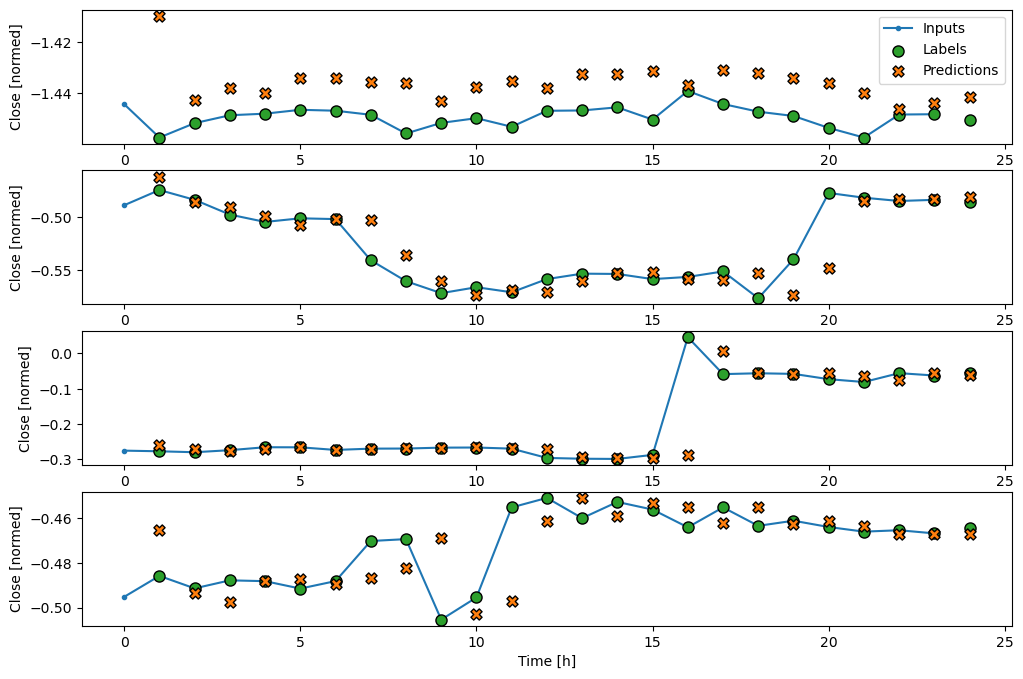

In [66]:
train_window.plot(lstm_model)